# Diagrama de Barras
Pablo Sao Alonzo -

In [2]:
# Importamos el paquete de pandas con el alias pd
import pandas as pd

Realizamos la lectura del archivo de excel, y cargamos unicamente las filas (**_skiprows_**) y columnas (**_usecols_**) que contienen los datos que deseamos.

El parámetro **skiprows** tiene una función lamda, la cual indica que no tome las columnas donde x tiene un valor de 0 (correspondiente a la primera fila de nuestro archivo de Excel), 1 y 3

In [3]:
SKIPROWS = [0,1]

for row in range(3,68):
    SKIPROWS.append(row)

for row in range(96,109):
    SKIPROWS.append(row)

Si existe duda de como cargar información desde un archivo de Excel con un formato predefinido, pueden leer el árticulo [**Cargando Datos de un Excel en Python con Pandas**](https://www.solutiondesign.tech/cargando-datos-de-un-excel-en-python-con-pandas/) en nuestro blog.

In [30]:
datos = pd.read_excel("marine-finfish-data-2020.xlsx"
                    ,sheet_name="Marine Finfish 2020 Data"
                    ,skiprows= SKIPROWS
                    ,usecols="B,H")

Como se podrá visualizar, hay varias instalaciones en el reporte que no cuentan con esta información.

In [31]:
# Verificamos los datos cargados
datos.head()

,Facility Name,Hydrogen peroxide
0,NaN,NaN
1,Adventure,NaN
2,Bancroft Point,NaN
3,Bar Island,29905.0
4,Benson,NaN


Eliminaremos las instalaciones (_Facility Name_) que no tienen datos con la función **dropna**, donde utilizaremos el parametro **inplace** con el valor **True** para indicar que deseamos preservar el cambio en nuestra variable datos

In [32]:
datos.dropna(inplace=True)

Revisando nuevamente nuestro _DataFrame_ podemos ver que se han eliminado las instalaciones que no tenian información del Peróxido de Hidrógeno (_Hydrogen peroxide_)

In [33]:
# Verificamos los nuevamente los datos dentro de nuestra variable
datos.head(15)

,Facility Name,Hydrogen peroxide
3,Bar Island,29905.0
5,Birch Point,8830.0
7,Curry Cove,7069.0
9,Eagle Eye Head Harbour Island,6417.0
12,Granger Cove,22141.0
15,Head Harbour Passage Cubs Point,10591.0
17,Limekiln,27649.0
18,Long Island Aquaculture Site,8398.0


Para poder elaborar la gŕafica de Pareto, vamos a ordenar nustra información por los datos de la columna "_Hydrogen peroxide_" utilizando el parametro **by** de la funicón **sort_value**, donde indicaremos que se ordene de forma descendente, pasando en el parametro **ascending** el valor **False** y por último indicaremos que los cambios sean aplicados a nuestra variable **datos** por medio del parametro **implace** con el valor **True**

In [36]:
datos.sort_values(by='Hydrogen peroxide',ascending=False,inplace=True)

## Gráfica de Barras con Matplotlib

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Peróxido de Hidrógeno')

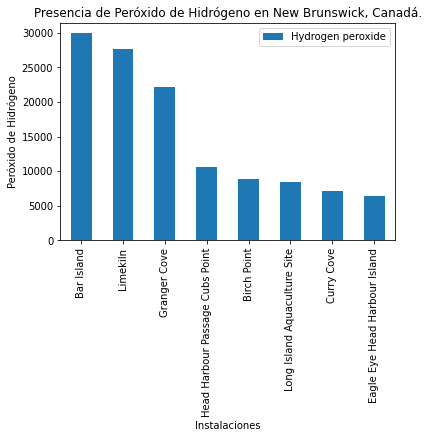

In [53]:
ax = datos.plot(x="Facility Name", y="Hydrogen peroxide", kind="bar", grid=False)

# Colocamos el título de la gráfica
ax.set_title('Presencia de Peróxido de Hidrógeno en New Brunswick, Canadá.')

# Le colocamos el nombre al eje X
ax.set_xlabel("Instalaciones")

# Le colocamos el nombre al eje Y
ax.set_ylabel("Peróxido de Hidrógeno")

# Mostramos la gráfica con el cambio en sus propiedades.
plt.show()

## Gráfica de Barras con Plotly

In [62]:
import plotly.express as px

In [63]:
fig = px.bar( datos
             ,x="Facility Name"
             ,y="Hydrogen peroxide"
             ,title="Presencia de Peróxido de Hidrógeno en New Brunswick, Canadá"
             ,labels={
                     "Facility Name": "Instalaciones",
                     "Hydrogen peroxide": "Peróxido de Hidrógeno"
                     }
            )
fig.show()